<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/01b_Sismos_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal - Dataset: Sismos_V01.csv


> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Diciembre 2023

# Introducción

En este notebook exploraremos uno de los modelos de Machine Learning más simples, pero de gran utilidad: la `Regresión Lineal`.

> El objetivo de este notebook es comprender el uso básico de la Regresión Lineal, tanto en su forma `simple` como `múltiple`, utilizando Python.

Podemos simplificar a la Regresión Lineal como un modelo matemático que nos permite predecir un valor de interés $Y$ (variable dependiente) considerando una serie de datos explicativos $X_i$ (variables independientes). Estos datos explicativos pueden contribuir con diferentes niveles de información para la predicción, y esto está controlado por los pesos $\beta_i$.

La expresión generalizada del modelo es la siguiente:

$$\begin{equation}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_nX_n + \epsilon
\end{equation}$$

Aquí, $\epsilon$ representa un término de error o aleatorio.

> Vamos a emplear el conjunto de datos [`Sismos_v1.csv`](https://github.com/sergioGarcia91/ML_and_EDA/blob/4c9b31fc65022597fb6e300d53bb746ce0bdb27f/Datasets/Sismos_V01.csv) en este análisis. Nos concentraremos exclusivamente en el componente espacial con el objetivo de obtener una comprensión más intuitiva y familiarizada de la Regresión Lineal.

---
**Observación:** No se realizará un Análisis Exploratorio de Datos (EDA) en este Notebook, ya que se llevó a cabo uno preliminar en [01a_Sismos_EDA.ipynb](https://github.com/sergioGarcia91/ML_and_EDA/blob/4c9b31fc65022597fb6e300d53bb746ce0bdb27f/01a_Sismos_EDA.ipynb). Puede revisarlo, ya que se van a considerar algunas de las observaciones de ese notebook. Al utilizar el archivo sin ningún tipo de filtrado o tratamiento de datos, los resultados pueden diferir, por lo que se recomienda replicar este notebook después de realizar un EDA según sus intereses.


# Inicio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go # Para hacer el grafico 3D

from sklearn.linear_model import LinearRegression # Para generar el Modelo de Reg. Lineal


# Cargar CSV

In [2]:
# Vamos a cargar esta vez desde una URL el archivo
url ='https://github.com/sergioGarcia91/ML_and_EDA/raw/main/Datasets/Sismos_V01.csv'
df = pd.read_csv(url, sep=';', decimal=',')
df = df.dropna()
df = df.drop_duplicates(subset=['FECHA - HORA UTC', 'LATITUD (°)', 'LONGITUD (°)'])
df = df.reset_index(drop=True)
df

FECHA - HORA UTC TIPO MAGNITUD  LATITUD (°)  LONGITUD (°)     X_3116  \
0        15/09/2019 2:20         MLr_3        5.711       -73.881  1021767.3   
1        8/08/2020 19:17         MLr_3        5.713       -73.861  1023982.6   
2       26/02/2020 22:32         MLr_3        5.716       -73.867  1023317.9   
3        14/09/2018 4:07           MLr        5.717       -73.817  1028856.4   
4        19/03/2018 6:44           MLr        5.719       -73.864  1023650.1   
...                  ...           ...          ...           ...        ...   
141386    4/11/2011 9:06            Ml        7.646       -73.209  1095831.5   
141387   22/12/2009 2:54            Ml        7.649       -73.247  1091637.6   
141388    4/03/2011 8:40            Ml        7.650       -73.223  1094285.7   
141389   18/02/2004 7:56            Ml        7.656       -73.223  1094284.4   
141390   15/07/2010 9:51            Ml        7.659       -73.233  1093180.3   

             Y_3116  PROF. (Km)  MAGNITUD  FASES  RMS (Seg)  GAP (°)  \
0       1123281.898      100.05       1.6    9.0        0.3    140.0   
1       1123503.864      123.00       1.5   12.0        0.8     96.0   
2       1123835.376      108.85       1.5   18.0        0.4     96.0   
3       1123948.230      107.61       1.2   12.0        0.3     99.0   
4       1124167.257      112.70       1.5   12.0        0.4    130.0   
...             ...         ...       ...    ...        ...      ...   
141386  1337365.312      135.40       1.4    7.0        0.4    132.0   
141387  1337688.855      127.30       2.3    8.0        0.2    116.0   
141388  1337804.645      136.70       1.4    4.0        0.3    173.0   
141389  1338468.281      140.40       2.4    6.0        0.4    187.0   
141390  1338797.918      148.00       1.5    4.0        0.1    139.0   

        ERROR LATITUD (Km)  ERROR LONGITUD (Km)  ERROR PROFUNDIDAD (Km)  \
0                    2.404                2.404                     3.8   
1                    4.031                4.031                     7.1   
2                    1.131                1.131                     2.3   
3                    1.344                1.344                     2.4   
4                    1.768                1.768                     3.5   
...                    ...                  ...                     ...   
141386               5.000                5.300                     7.2   
141387               2.300                4.900                     4.2   
141388               4.600               13.000                     9.7   
141389               6.400               13.100                    15.4   
141390               5.200                6.600                     5.4   

       DEPARTAMENTO  MUNICIPIO    ESTADO  
0         Santander   Albania     manual  
1         Santander   Albania     manual  
2         Santander   Albania     manual  
3         Santander   Albania     manual  
4         Santander   Albania     manual  
...             ...        ...       ...  
141386    SANTANDER  EL_PLAYON  Revisado  
141387    SANTANDER  EL_PLAYON  Revisado  
141388    SANTANDER  EL_PLAYON  Revisado  
141389    SANTANDER  EL_PLAYON  Revisado  
141390    SANTANDER  EL_PLAYON  Revisado  

[141391 rows x 17 columns]

In [3]:
df.columns

Index(['FECHA - HORA UTC', 'TIPO MAGNITUD', 'LATITUD (°)', 'LONGITUD (°)',
       'X_3116', 'Y_3116', 'PROF. (Km)', 'MAGNITUD', 'FASES', 'RMS (Seg)',
       'GAP (°)', 'ERROR LATITUD (Km)', 'ERROR LONGITUD (Km)',
       'ERROR PROFUNDIDAD (Km)', 'DEPARTAMENTO', 'MUNICIPIO', 'ESTADO'],
      dtype='object')

En el EDA preliminar realizado, se optó por centrarse exclusivamente en el estudio de los sismos con respecto a las coordenadas en X, la profundidad y la magnitud. Durante este proceso de análisis de correlación, se observó que variables como `X_3116` y `LONGITUD (°)` mostraban una correlación lineal de Pearson perfecta, lo que se puede considerar como una redundancia de información o una existencia de relación entre las dos variables.

Sin embargo, no solo no es de nuestro interés, sino que también se debe descartar el uso de variables redundantes o aquellas que están relacionadas entre sí, ya que esto constituye un **problema de multicolinealidad**.

La multicolinealidad se puede entender de manera simplificada como la existencia de una relación lineal entre las variables independientes. En nuestro caso, al realizar un `pairplot`, se evidencia la formación de una recta casi perfecta en el gráfico de `X_3116` vs `LONGITUD (°)`.

---
Esta multicolinealidad puede afectar significativamente al modelo, por lo que es necesario eliminar algunas de las variables o aplicar alguna transformación a las mismas.


<Figure size 1000x1000 with 0 Axes>

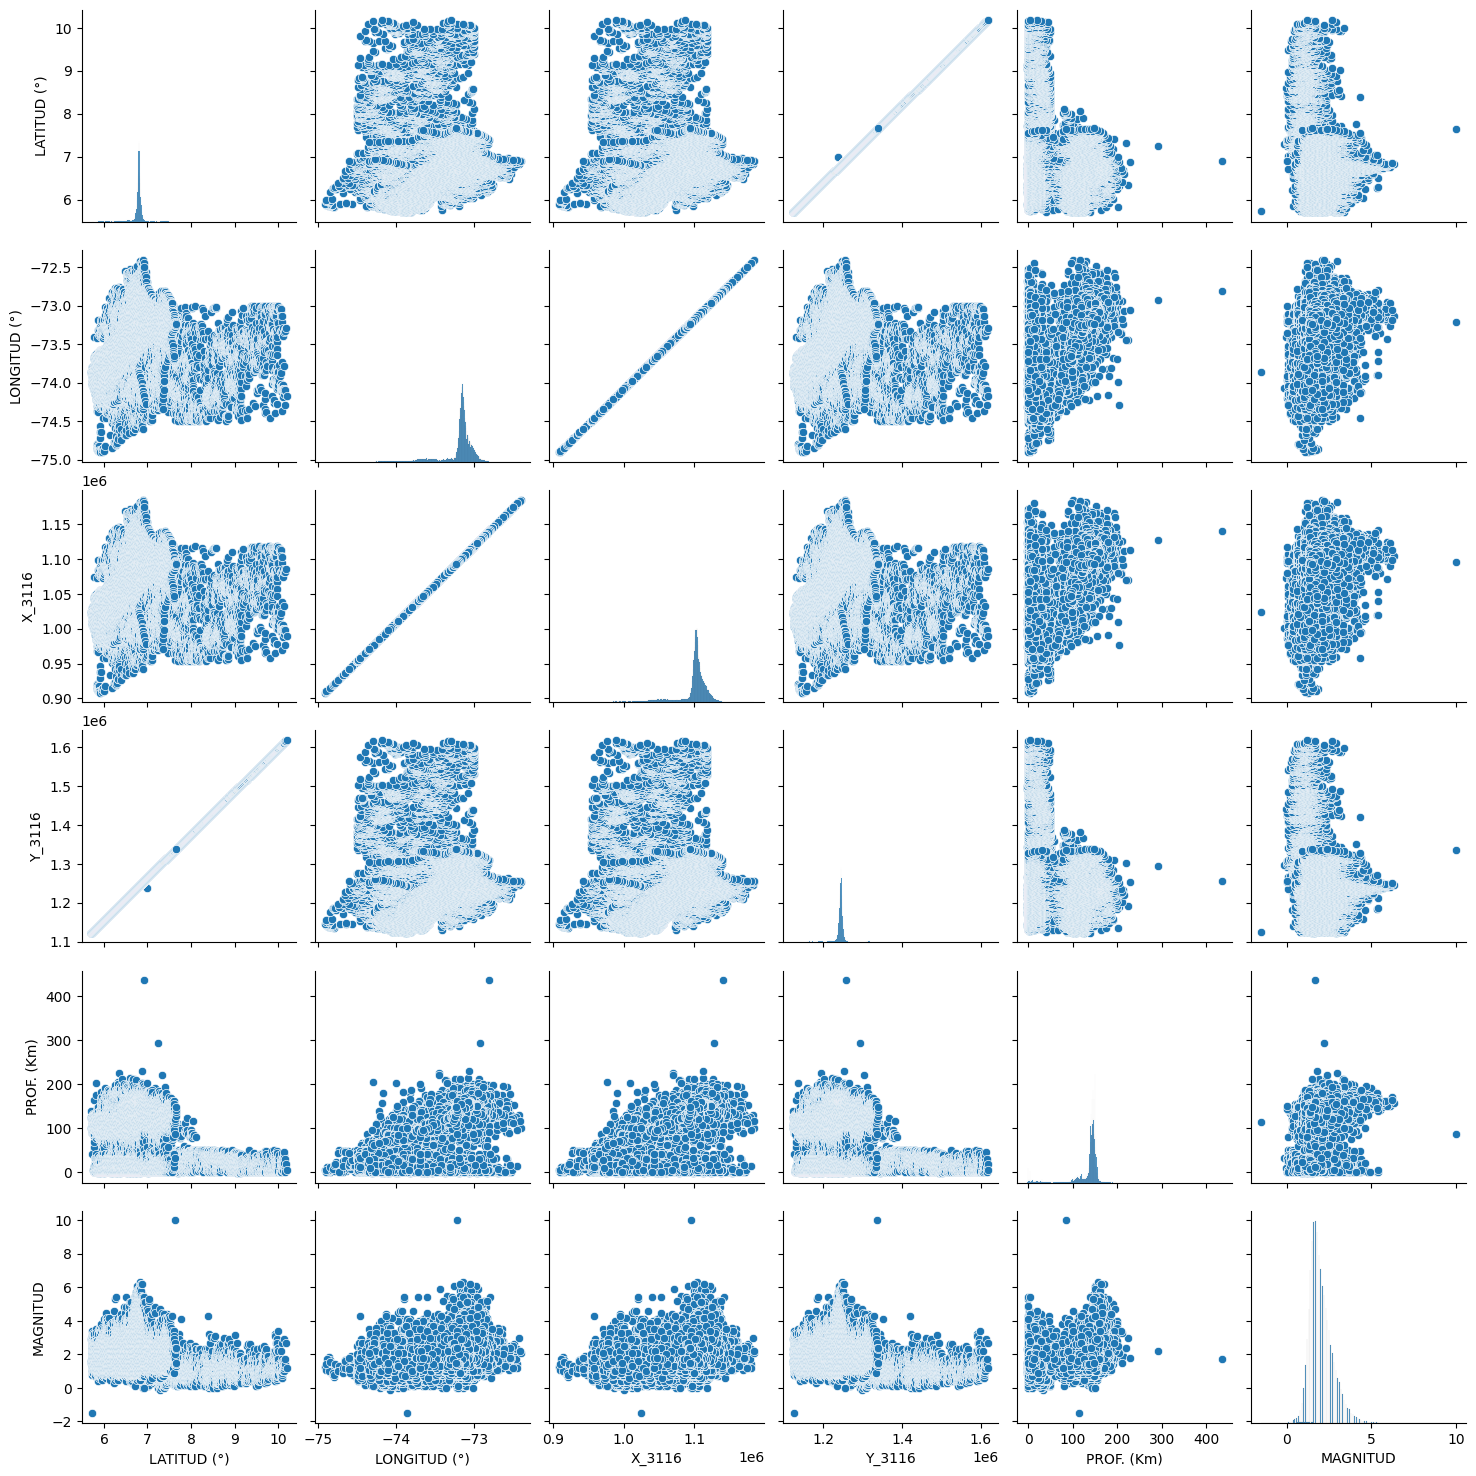

In [4]:
plt.figure(figsize=(10,10))
sns.pairplot(df[['LATITUD (°)', 'LONGITUD (°)',
                 'X_3116', 'Y_3116',
                 'PROF. (Km)', 'MAGNITUD']])
plt.show()

Para la generación de los modelos de regresión lineal, se empleará la estructura implementada en `Scikit-Learn` utilizando la clase [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

# RL Simple

El primer modelo se enfocará en el `corte W-E` de los eventos. Antes de continuar, procederemos a guardar en dos variables separadas los valores a predecir $Y$ o profundidad, y las variables independientes $X$ o las coordenadas en X.

>Es importante destacar que ajustaremos la representación de la profundidad, estableciéndola como un valor negativo. Además, realizaremos una conversión de unidades para expresar tanto la profundidad como las coordenadas en X en metros.


In [5]:
X_corteWE = df['X_3116'].to_numpy().reshape(-1, 1)
# Se hace un reshape para que nos quede como vector columna y no como fila
X_corteWE

array([[1021767.3],
       [1023982.6],
       [1023317.9],
       ...,
       [1094285.7],
       [1094284.4],
       [1093180.3]])

In [6]:
Profundidades = df['PROF. (Km)'].to_numpy() * -1000
# No es requerido un reshape, si la queremos como vector fila
Profundidades

array([-100050., -123000., -108850., ..., -136700., -140400., -148000.])

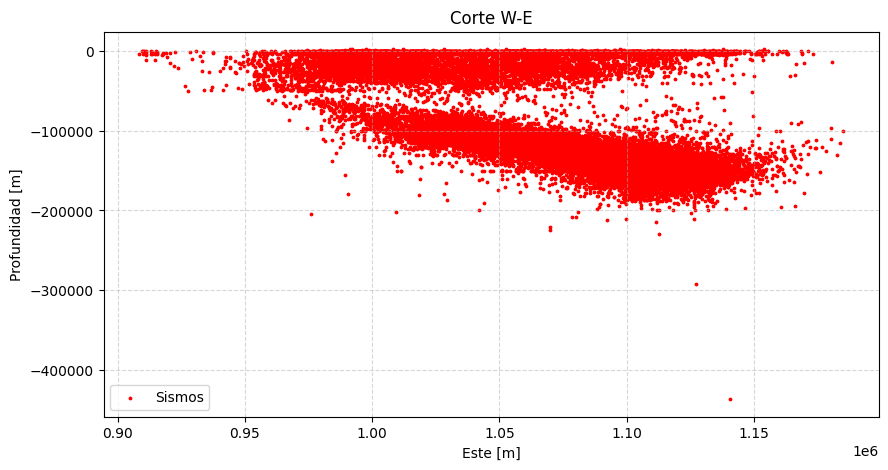

In [7]:
# Graficamos para verificar que este todo bien
plt.figure(figsize=(10,5))

plt.scatter(X_corteWE,
            Profundidades,
            c='r',
            s=3,
            label='Sismos')

plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.xlabel('Este [m]')
plt.ylabel('Profundidad [m]')
plt.title('Corte W-E')

plt.show()

Recordando la forma simple de la ecuación de la recta:

$$\begin{equation}
y = m\cdot x + b
\end{equation}$$

Donde:
- $y$ representa las profundidades que queremos predecir.
- $x$ la variable independiente o las coordenadas en X.
- $m$ es la pendiente, coeficiente o peso de $x$, que indica la magnitud y dirección de la relación.
- $b$ es el punto de corte en el eje $y$, también conocido como intercepto, que representa el valor de $y$ cuando $x$ es $0$.


In [8]:
modeloRL_corteWE = LinearRegression() # Creamos el modelo
modeloRL_corteWE.fit(X_corteWE, Profundidades) # Entrenamos el modelo

puntaje_modeloRL_corteW = modeloRL_corteWE.score(X_corteWE, Profundidades) # Calculamos su puntaje
print('Score: ', puntaje_modeloRL_corteW) # Entre más cerca de 1.0 mejor

Score:  0.5594190217548863


In [9]:
modeloRL_corteWE.coef_ # Este es el coeficiente o la pendiente m

array([-0.8655902])

In [10]:
modeloRL_corteWE.intercept_ # Este es el intercepto o punto de corte b

814510.2327166173

In [11]:
# Predecir la profundidad usando el modelo
Profundidad_corteWE = modeloRL_corteWE.predict(X_corteWE)
Profundidad_corteWE # Nos regresa un vector con la profundidad estimada para cada evento

array([ -69921.53333455,  -71839.07531434,  -71263.71750548, ...,
       -132692.75001295, -132691.62474568, -131735.92660101])

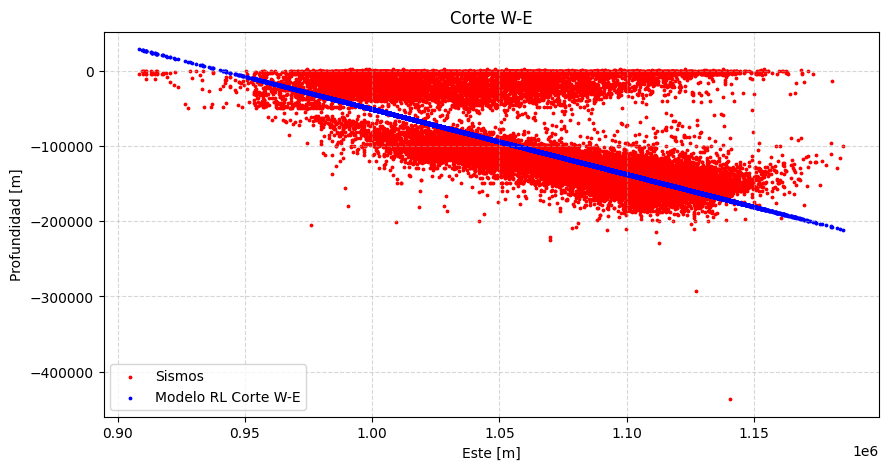

In [12]:
# Incluyamos esos puntos
plt.figure(figsize=(10,5))

plt.scatter(X_corteWE,
            Profundidades,
            c='r',
            s=3,
            label='Sismos')

plt.scatter(X_corteWE,
            Profundidad_corteWE,
            c='b',
            s=3,
            label='Modelo RL Corte W-E')

plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.xlabel('Este [m]')
plt.ylabel('Profundidad [m]')
plt.title('Corte W-E')

plt.show()

In [13]:
# La recta obtenida es una nube de puntos, por lo que mejor hacerla como una recta
# una recta al menos requiere de 2 puntos, por lo que solo nos interesaría lo extremos
# del Corte W-E
Xmin_corteWE = X_corteWE.min()
Xmax_corteWE = X_corteWE.max()
limites_corteWE = np.array([[Xmin_corteWE],[Xmax_corteWE]])
limites_corteWE

array([[ 908256.14],
       [1185091.9 ]])

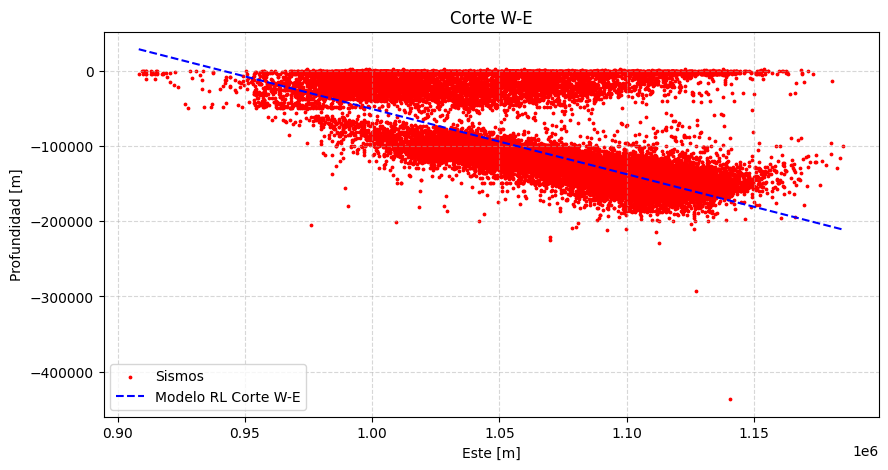

In [14]:
# Incluyamos esos puntos
plt.figure(figsize=(10,5))

plt.scatter(X_corteWE,
            Profundidades,
            c='r',
            s=3,
            label='Sismos')

plt.plot(limites_corteWE,
            modeloRL_corteWE.predict(limites_corteWE),
            c='b',
            ls='--',
            label='Modelo RL Corte W-E')

plt.grid(ls='--', alpha=0.5)
plt.legend()
plt.xlabel('Este [m]')
plt.ylabel('Profundidad [m]')
plt.title('Corte W-E')

plt.show()

# RL Multiple

El segundo modelo se enfocará en los tres ejes de coordenadas o en un espacio tridimensional (`3D`) de los eventos. Se procederá a guardar los valores a predecir, denotados como $Y$ o profundidad, y las variables independientes, representadas como $X$ o las coordenadas en X e Y.

>Se aplicarán los mismos ajustes que en el modelo de Regresión Lineal Simple.


In [15]:
X_3D = df[['X_3116', 'Y_3116']].to_numpy()
# No es necesario el reshape ya está en vector columna, en este caso 2 columnas
# al tener dos variables independientes
X_3D.shape

(141391, 2)

In [16]:
X_3D[:,0]

array([1021767.3, 1023982.6, 1023317.9, ..., 1094285.7, 1094284.4,
       1093180.3])

In [17]:
Profundidades # No es necesario crear de nuevo esta variable,
# ya que son las mismas profundidades

array([-100050., -123000., -108850., ..., -136700., -140400., -148000.])

In [18]:
# Graficamos para verificar
# Con matplotlib se puede hacer gráficos 3D
# pero a gusto personal prefiero Plotly

fig = go.Figure(data=[go.Scatter3d(
     x=X_3D[::3,0],
     y=X_3D[::3,1],
     z=Profundidades[::3],
     mode='markers',
     marker=dict(
          size=1,
          color='rgb(255,0,0)',
          opacity=0.8)
     )])
# se usa [::3] para carga cada 3 datos, para que no se haga tan pesada la figura
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

En este caso la forma simple de la ecuación de la recta pasaria mas a ser de un plano:

$$\begin{equation}
y = m_1\cdot x_1 + m_2\cdot x_2 + b
\end{equation}$$

Donde:
- $y$ representa las profundidades que queremos predecir.
- $x_1$ la variable independiente o las coordenadas en X.
- $x_2$ la variable independiente o las coordenadas en Y.
- $m_1$ y $m_2$ son las pendientes, coeficientes o pesos de $x_1$ y $x_2$ respectivamente.
- $b$ es el punto de corte en el eje $y$.

In [19]:
modeloRL_3D = LinearRegression() # Creamos el modelo
modeloRL_3D.fit(X_3D, Profundidades) # Entrenamos el modelo

puntaje_modeloRL_3D = modeloRL_3D.score(X_3D, Profundidades) # Calculamos su puntaje
print('Score: ', puntaje_modeloRL_3D) # Entre más cerca de 1.0 mejor

Score:  0.6203093291317523


In [20]:
m1 = modeloRL_3D.coef_[0]
m2 = modeloRL_3D.coef_ [1]

print('m1= ', m1)
print('m2= ', m2)

m1=  -0.8844452721857275
m2=  0.21292566473193408


In [21]:
modeloRL_3D.intercept_

570232.4826236194

In [22]:
# Predecir la profundidad usando el modelo
Profundidad_3D = modeloRL_3D.predict(X_3D)
Profundidad_3D # Nos regresa un vector con la profundidad estimada para cada evento

array([ -94289.23032236,  -96201.27967573,  -95542.80149034, ...,
       -112750.38784374, -112607.93292844, -111561.22872608])

In [23]:
# Pero como ya vimos solo requerimos de lo valores extremos para representar
# el modelo lineal, en nuestro caso un plano
# vamos a requerir solo 4 puntos
# el superior izquiedo
p_sup_izq = np.array([X_3D[:,0].min(), X_3D[:,1].max()])
# el superior derecho
p_sup_der = np.array([X_3D[:,0].max(), X_3D[:,1].max()])
# el inferior derecho
p_inf_der = np.array([X_3D[:,0].max(), X_3D[:,1].min()])
# el inferior izquierdo
p_inf_izq = np.array([X_3D[:,0].min(), X_3D[:,1].min()])

limites_3D = np.array([
    p_sup_izq,
    p_sup_der,
    p_inf_der,
    p_inf_izq,

    ])

limites_3D

array([[ 908256.14 , 1619192.65 ],
       [1185091.9  , 1619192.65 ],
       [1185091.9  , 1123061.274],
       [ 908256.14 , 1123061.274]])

In [24]:
Profundidad_3D_plano = modeloRL_3D.predict(limites_3D)
Profundidad_3D_plano

array([ 111697.30499727, -133148.77410667, -238787.87713584,
          6058.2019681 ])

In [25]:
# Graficamos para verificar

fig = go.Figure(data=[go.Scatter3d(
     x=X_3D[::5,0],
     y=X_3D[::5,1],
     z=Profundidades[::5],
     mode='markers',
     marker=dict(
          size=1,
          color='rgb(255,0,0)',
          opacity=0.8)
     )])

fig.add_trace(go.Mesh3d(x=limites_3D[:,0],
               y=limites_3D[:,1],
               z=Profundidad_3D_plano, color='rgb(0,0,255)'))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# Comparar modelos

In [26]:
limites_3D[:,0] # Solo las coordenadas X

array([ 908256.14, 1185091.9 , 1185091.9 ,  908256.14])

In [27]:
# Vamos a proyectar como plano el modelo lineal
# del corte W-E
Profundidad_3D_corteWE = modeloRL_corteWE.predict(limites_3D[:,0].reshape(-1,1))
Profundidad_3D_corteWE

array([  28332.61485097, -211293.70723129, -211293.70723129,
         28332.61485097])

In [28]:
# Graficamos para verificar

fig = go.Figure(data=[go.Scatter3d(
     x=X_3D[::3,0],
     y=X_3D[::3,1],
     z=Profundidades[::3],
     mode='markers',
     marker=dict(
          size=1,
          color='rgb(255,0,0)',
          opacity=0.8)
     )])

fig.add_trace(go.Mesh3d(x=limites_3D[:,0],
               y=limites_3D[:,1],
               z=Profundidad_3D_plano, color='rgb(0,0,255)'))

fig.add_trace(go.Mesh3d(x=limites_3D[:,0],
               y=limites_3D[:,1],
               z=Profundidad_3D_corteWE, color='rgb(0,255,0)')) # , opacity=0.80

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Posiblemente habrá notado un pequeño problema o consideración que no se mencionó inicialmente, pero que se infirió durante el Análisis Exploratorio de Datos. La posible división de los eventos sísmicos en dos grupos, aquellos con profundidades menores a 50 km y otros con profundidades mayores a 50 km, podría tener un impacto significativo en los resultados o en la generación de los modelos.

Por lo tanto, sería ideal realizar esta separación en dos grupos y generar los respectivos modelos de manera individual.


# Fin